# Data Augmentation Exercise
---
## 데이터가 더 부족한 세상으로!

[여기 참고](https://www.cs.toronto.edu/~kriz/cifar.html)

## Data Loading

In [1]:
from tensorflow.keras.datasets.cifar100 import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

169001437/169001437 [==============================] - 120s 1us/step


In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt

이미지 인덱스 : [71]


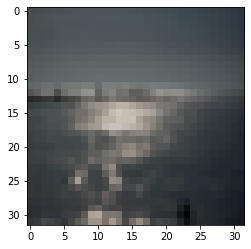

In [4]:
### 반복실행
idx = random.randint(0,49999)
print(f"이미지 인덱스 : {y_train[idx]}")
plt.imshow(x_train[idx])
plt.show()

In [5]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

## Validation set 생성

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 1), (10000, 1))

## X : Min-Max Scaling

In [7]:
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

## Y : One-Hot Encoding

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

## **Data Augmentation**

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2
)

datagen.fit(x_train)

train_gen = datagen.flow(x_train, y_train, batch_size=256)

## Keras로 자유롭게 CNN 모델링

1. [이 구조를 미니 버전으로 활용해봐도 좋다](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFA5415B38AC752E)
2. DropOut, BatchNormalization 등의 기능도 같이 활용해보자.

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
# 1. 세션 클리어
keras.backend.clear_session()

# 2. layer 엮기
il = Input(shape=(32, 32, 3))
hl = Conv2D(32, (3, 3), padding='same', activation='relu')(il)
hl = Conv2D(32, (3, 3), padding='same', activation='relu')(hl)
hl = MaxPool2D()(hl)
hl = BatchNormalization()(hl)

hl = Conv2D(64, (3, 3), padding='same', activation='relu')(hl)
hl = Conv2D(64, (3, 3), padding='same', activation='relu')(hl)
hl = MaxPool2D()(hl)
hl = BatchNormalization()(hl)

hl = Conv2D(128, (3, 3), padding='same', activation='relu')(hl)
hl = Conv2D(128, (3, 3), padding='same', activation='relu')(hl)
hl = MaxPool2D()(hl)
hl = BatchNormalization()(hl)

hl = Flatten()(hl)
hl = Dropout(0.2)(hl)
ol = Dense(100, activation='softmax')(hl)

# 3. input, output
model = Model(il, ol)

# 4. 모델 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496 

## Early Stopping을 이용한 학습

- 8 epoch 연속으로 val_loss가 개선되지 않았으면 멈추는 얼리스토핑 모델을 만드시오.

In [13]:
es = EarlyStopping(patience=8, verbose=1, restore_best_weights=True)

In [14]:
hist = model.fit(train_gen, epochs=1000, validation_data=(x_val, y_val), callbacks=[es])

Epoch 1/1000
157/157 [==============================] - 36s 150ms/step - loss: 4.1921 - accuracy: 0.0971 - val_loss: 5.4718 - val_accuracy: 0.0166
Epoch 2/1000
157/157 [==============================] - 23s 147ms/step - loss: 3.6613 - accuracy: 0.1600 - val_loss: 5.0409 - val_accuracy: 0.0485
Epoch 3/1000
157/157 [==============================] - 23s 146ms/step - loss: 3.3917 - accuracy: 0.2022 - val_loss: 4.3635 - val_accuracy: 0.1140
Epoch 4/1000
157/157 [==============================] - 23s 147ms/step - loss: 3.1965 - accuracy: 0.2341 - val_loss: 3.1538 - val_accuracy: 0.2427
Epoch 5/1000
157/157 [==============================] - 23s 146ms/step - loss: 3.0432 - accuracy: 0.2623 - val_loss: 3.0295 - val_accuracy: 0.2619
Epoch 6/1000
157/157 [==============================] - 23s 147ms/step - loss: 2.8980 - accuracy: 0.2844 - val_loss: 3.3014 - val_accuracy: 0.2463
Epoch 7/1000
157/157 [==============================] - 23s 149ms/step - loss: 2.7870 - accuracy: 0.3047 - val_loss: 2

* 예측값 생성 및 구조 변경

In [15]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [16]:
single_y_pred = y_pred.argmax(axis=1)
single_y_test = y_test.argmax(axis=1)

* 성능 평가

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
test_acc = accuracy_score(single_y_test, single_y_pred)

In [19]:
print(f'테스트셋 정확도 : {test_acc*100}%')

테스트셋 정확도 : 48.1%


## 이미지 시각화

In [20]:
import random as rd

* 반복 실행하여 확인해봅시다.

id : 4759
실제 카테고리 인덱스 : 67
모델의 카테고리 인덱스 예측 : 67
정답
모델의 카테고리별 확률 : 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 96.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]%


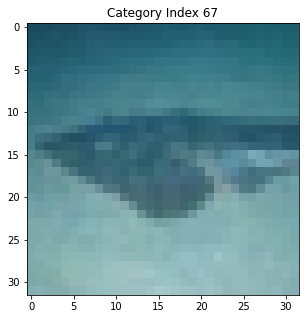

In [23]:
rand_n = rd.randrange(0, single_y_test.shape[0])

print(f'id : {rand_n}')
print(f'실제 카테고리 인덱스 : {single_y_test[rand_n]}')
print(f'모델의 카테고리 인덱스 예측 : {single_y_pred[rand_n]}')

if single_y_test[rand_n] == single_y_pred[rand_n] :
    print('정답')
else :
    print('오답')

print('======================================')
print(f'모델의 카테고리별 확률 : \n{np.floor(y_pred[rand_n]*100)}%')
print('======================================')

plt.figure(figsize=(5,5))
plt.title(f'Category Index {single_y_test[rand_n]}')
plt.imshow(x_test[rand_n].reshape(32,32,3))
plt.show()

* 틀린 것만 확인해봅시다.

id : 1202
실제 카테고리 인덱스 : 55
모델의 카테고리 인덱스 예측 : 31
오답
모델의 카테고리별 확률 : 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 96.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]%


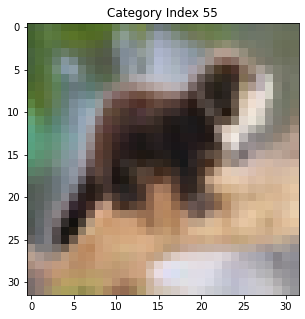

In [27]:
y_tf = single_y_pred==single_y_test
false_idx = np.where(y_tf==False)[0]
false_len = len(false_idx)

idx = false_idx[rd.randrange(0, false_len)]

print(f'id : {idx}')
print(f'실제 카테고리 인덱스 : {single_y_test[idx]}')
print(f'모델의 카테고리 인덱스 예측 : {single_y_pred[idx]}')

if single_y_test[idx] == single_y_pred[idx] :
    print('정답')
else :
    print('오답')

print('======================================')
print(f'모델의 카테고리별 확률 : \n{np.floor(y_pred[rand_n]*100)}%')
print('======================================')

plt.figure(figsize=(5,5))
plt.title(f'Category Index {single_y_test[idx]}')
plt.imshow(x_test[idx].reshape(32,32,3))
plt.show()